<a href="https://colab.research.google.com/github/drshahizan/Python-big-data/blob/main/Project/SamVerse/Spotify_with_QnA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Spotify Charts (Pandas vs PySpark vs Koalas)**
#### Group Members:
|Name |Matric|
|:---:|:---:|
|LUQMAN ARIFF BIN NOOR AZHAR |A20EC0202|
|AHMAD AIMAN HAFIZI BIN MUHAMMAD	| A20EC0177|
|LEE CAI XUAN	| A20EC0062|
|MYZA NAZIFA BINTI NAZRY	| A20EC0219|


---
For this assignment, we have decided to use the dataset, *Spotify Charts* which we retreived from Kaggle with a size of 3.48GB. The dataset has provided information such as the title of the song, the rank of the song, the artist, the date, the url, the region and others of all the "Top 200" and "Viral 50" charts which has been published globally by Spotify. We will analyse the dataset by using 3 different libraries which are **Pandas, PySpark and Koalas**.

The dataset can be found in the link [here](https://www.kaggle.com/datasets/dhruvildave/spotify-charts).


The objective that we would like to accomplish in this project are as below:


1.   To compare the time completion between the 3 libraries.
2.   To perform data analyzation and data visualization.
3.   To ask and answer different possible questions based on dataset.




---
#### Attribute Information:
| Attribute | Description |
| --- | --- |
| **Title** |   Song Title  |
|**Rank** |   Latest Ranking of the song on Spotify |
| **Date** | Latest Date of Song Ranking |
| **Artist** | Artist Name |
| **Url** | Spotify Url  |
| **Region** |  Region of Account on Spotify   |
| **Chart** | Song Charting on Spotify  |
| **Trend** | Position Changes of Song Ranking on Spotify  |
| **Stream** | Total Number of Song Streaming on Spotify  |

## Downloading the Dataset

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
charts = "/content/drive/MyDrive/Colab Notebooks/charts.csv"

## Data Preparation and Cleaning

> We will be begin our data cleansing using these three methods

*   Importing data from Google Drive
*   Removing null data
*   Removng duplicates





Import Data

**1. Pandas**

In [3]:
import pandas as pd
import numpy as np

In [4]:
%%time
df = pd.read_csv(charts)
df.head(5)

CPU times: user 1min 1s, sys: 8.92 s, total: 1min 10s
Wall time: 1min 48s


,title,rank,date,artist,url,region,chart,trend,streams
0,Chantaje (feat. Maluma),1,2017-01-01,Shakira,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,Argentina,top200,SAME_POSITION,253019.0
1,Vente Pa' Ca (feat. Maluma),2,2017-01-01,Ricky Martin,https://open.spotify.com/track/7DM4BPaS7uofFul...,Argentina,top200,MOVE_UP,223988.0
2,Reggaetón Lento (Bailemos),3,2017-01-01,CNCO,https://open.spotify.com/track/3AEZUABDXNtecAO...,Argentina,top200,MOVE_DOWN,210943.0
3,Safari,4,2017-01-01,"J Balvin, Pharrell Williams, BIA, Sky",https://open.spotify.com/track/6rQSrBHf7HlZjtc...,Argentina,top200,SAME_POSITION,173865.0
4,Shaky Shaky,5,2017-01-01,Daddy Yankee,https://open.spotify.com/track/58IL315gMSTD37D...,Argentina,top200,MOVE_UP,153956.0


**2. PySpark**

In [5]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 16.3 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=bd5cc95a401b579e9f1e5d6af94773ded6769b7a0ffb5ead32d9f436c32fefaf
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark


In [6]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as func
spark = SparkSession.builder.getOrCreate()

In [7]:
%%time
df_py = spark.read.csv(charts, header = True)
df_py.show(5)

+--------------------+----+----------+--------------------+--------------------+---------+------+-------------+-------+
|               title|rank|      date|              artist|                 url|   region| chart|        trend|streams|
+--------------------+----+----------+--------------------+--------------------+---------+------+-------------+-------+
|Chantaje (feat. M...|   1|2017-01-01|             Shakira|https://open.spot...|Argentina|top200|SAME_POSITION| 253019|
|Vente Pa' Ca (fea...|   2|2017-01-01|        Ricky Martin|https://open.spot...|Argentina|top200|      MOVE_UP| 223988|
|Reggaetón Lento (...|   3|2017-01-01|                CNCO|https://open.spot...|Argentina|top200|    MOVE_DOWN| 210943|
|              Safari|   4|2017-01-01|J Balvin, Pharrel...|https://open.spot...|Argentina|top200|SAME_POSITION| 173865|
|         Shaky Shaky|   5|2017-01-01|        Daddy Yankee|https://open.spot...|Argentina|top200|      MOVE_UP| 153956|
+--------------------+----+----------+--

**3. Koalas**

In [8]:
!pip install koalas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.8/390.8 KB 6.5 MB/s eta 0:00:00


In [9]:
import databricks.koalas as ks

In [10]:
%%time
df_ks = ks.read_csv(charts)
df_ks.head(5)

CPU times: user 649 ms, sys: 94 ms, total: 743 ms
Wall time: 1min 43s


,title,rank,date,artist,url,region,chart,trend,streams
0,Chantaje (feat. Maluma),1,2017-01-01,Shakira,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,Argentina,top200,SAME_POSITION,253019
1,Vente Pa' Ca (feat. Maluma),2,2017-01-01,Ricky Martin,https://open.spotify.com/track/7DM4BPaS7uofFul...,Argentina,top200,MOVE_UP,223988
2,Reggaetón Lento (Bailemos),3,2017-01-01,CNCO,https://open.spotify.com/track/3AEZUABDXNtecAO...,Argentina,top200,MOVE_DOWN,210943
3,Safari,4,2017-01-01,"J Balvin, Pharrell Williams, BIA, Sky",https://open.spotify.com/track/6rQSrBHf7HlZjtc...,Argentina,top200,SAME_POSITION,173865
4,Shaky Shaky,5,2017-01-01,Daddy Yankee,https://open.spotify.com/track/58IL315gMSTD37D...,Argentina,top200,MOVE_UP,153956


In [ ]:
# I remove column 'rank','date','url,'chart' from the table. 
# There will be error and I don't know why
# So, there should it will always be
# To get the table with all column, use "df_ks" instead of "df_ks_eda"
df_ks_eda = df_ks.drop(columns=['rank','date','url','chart'])
df_ks_eda.head(10)

,title,artist,region,trend,streams
0,Chantaje (feat. Maluma),Shakira,Argentina,SAME_POSITION,253019
1,Vente Pa' Ca (feat. Maluma),Ricky Martin,Argentina,MOVE_UP,223988
2,Reggaetón Lento (Bailemos),CNCO,Argentina,MOVE_DOWN,210943
3,Safari,"J Balvin, Pharrell Williams, BIA, Sky",Argentina,SAME_POSITION,173865
4,Shaky Shaky,Daddy Yankee,Argentina,MOVE_UP,153956
5,Traicionera,Sebastian Yatra,Argentina,MOVE_DOWN,151140
6,Cuando Se Pone a Bailar,Rombai,Argentina,MOVE_DOWN,148369
7,Otra vez (feat. J Balvin),Zion & Lennox,Argentina,MOVE_DOWN,143004
8,La Bicicleta,"Carlos Vives, Shakira",Argentina,MOVE_UP,126389
9,Dile Que Tu Me Quieres,Ozuna,Argentina,MOVE_DOWN,112012


Removing null

**1. Pandas**

In [ ]:
df.isnull().sum()

title           11
rank             0
date             0
artist          18
url              0
region           0
chart            0
trend            0
streams    5851610
dtype: int64

In [ ]:
%%time
df = df.dropna()

CPU times: user 11.6 s, sys: 980 ms, total: 12.5 s
Wall time: 12.5 s


In [ ]:
df.isnull().sum()

title      0
rank       0
date       0
artist     0
url        0
region     0
chart      0
trend      0
streams    0
dtype: int64

**2. Pyspark**

In [ ]:
from pyspark.sql.functions import col,isnan,when,count
df_py1 = df_py.select([count(when(col(c).contains('None') | \
                            col(c).contains('NULL') | \
                            (col(c) == '' ) | \
                            col(c).isNull() | \
                            isnan(c), c 
                           )).alias(c)
                    for c in df.columns])
df_py1.show(5)

+-----+----+----+------+---+------+-----+-----+-------+
|title|rank|date|artist|url|region|chart|trend|streams|
+-----+----+----+------+---+------+-----+-----+-------+
|  341|   0|   0|   121|  7|     0|    0|    0|5848001|
+-----+----+----+------+---+------+-----+-----+-------+



In [ ]:
%%time
df_py = df_py.dropna()

CPU times: user 4.71 ms, sys: 102 µs, total: 4.81 ms
Wall time: 49.7 ms


In [ ]:
df_py1 = df_py.select([count(when(col(c).contains('None') | \
                            col(c).contains('NULL') | \
                            (col(c) == '' ) | \
                            col(c).isNull() | \
                            isnan(c), c 
                           )).alias(c)
                    for c in df.columns])
df_py1.show()

+-----+----+----+------+---+------+-----+-----+-------+
|title|rank|date|artist|url|region|chart|trend|streams|
+-----+----+----+------+---+------+-----+-----+-------+
|   69|   0|   0|    66|  0|     0|    0|    0|      0|
+-----+----+----+------+---+------+-----+-----+-------+



**3. Koalas**

In [ ]:
# Check to see how many null values in dataset
df_ks_eda.isnull().sum()

title            0
artist           0
region           0
trend            0
streams    5848001
dtype: int64

In [ ]:
# Column 'stream' is not 100% null values
# It also means there are 0 people streaming those songs
# SO, we use fillna() function to fill values with 0
df_ks_eda.fillna(0).head()

,title,artist,region,trend,streams
0,Chantaje (feat. Maluma),Shakira,Argentina,SAME_POSITION,253019
1,Vente Pa' Ca (feat. Maluma),Ricky Martin,Argentina,MOVE_UP,223988
2,Reggaetón Lento (Bailemos),CNCO,Argentina,MOVE_DOWN,210943
3,Safari,"J Balvin, Pharrell Williams, BIA, Sky",Argentina,SAME_POSITION,173865
4,Shaky Shaky,Daddy Yankee,Argentina,MOVE_UP,153956


In [ ]:
# Check again to see how many null values in dataset are still there
df_ks_eda.isnull().sum()

title            0
artist           0
region           0
trend            0
streams    5848001
dtype: int64

In [ ]:
%%time
df_ks_eda = df_ks_eda.dropna(how='any') 

CPU times: user 79.2 ms, sys: 14.1 ms, total: 93.3 ms
Wall time: 575 ms


Removing duplicates

**1. Pandas**

In [ ]:
%%time
df = df.drop_duplicates()

CPU times: user 38.3 s, sys: 2.41 s, total: 40.7 s
Wall time: 41.3 s


**2. Pyspark**

In [ ]:
%%time
df_py.dropDuplicates()

CPU times: user 2.33 ms, sys: 0 ns, total: 2.33 ms
Wall time: 17.8 ms


DataFrame[title: string, rank: string, date: string, artist: string, url: string, region: string, chart: string, trend: string, streams: string]

**3. Koalas**

In [ ]:
%%time
df_ks_eda.drop_duplicates().head(5)

CPU times: user 70.7 ms, sys: 6.07 ms, total: 76.8 ms
Wall time: 354 ms


,title,artist,region,trend,streams
61077,!,O.S.T.R.,Poland,MOVE_DOWN,11148
22573,!,O.S.T.R.,Poland,MOVE_DOWN,11833
2062499,!,O.S.T.R.,Poland,MOVE_DOWN,13001
484713,!,O.S.T.R.,Poland,MOVE_DOWN,7757
837259,!,O.S.T.R.,Poland,MOVE_DOWN,7786


##Perform exploratory analysis & visualization

Compute the mean for 'streams' column

**1. Pandas**

In [ ]:
%time
print("The median for Rating column is:",df['streams'].median()), print()
%time
print("The mean for Rating column is:",round(df['streams'].mean(), 2)), print()
%time
print("The mode for Rating column is:",df['streams'].mode())

CPU times: user 71 µs, sys: 0 ns, total: 71 µs
Wall time: 101 µs
The median for Rating column is: 9565.0

CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 10 µs
The mean for Rating column is: 55261.33

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs
The mode for Rating column is: 0    1002.0
dtype: float64


**2. Pyspark**

In [ ]:
%%time
from pyspark.sql.functions import mean
print(df_py.select(mean('streams')).collect())

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.39 µs
[Row(avg(streams)=55266.54339716303)]


**3. Koalas**

In [ ]:
%%time
df_ks['streams'].astype(int).mean()

CPU times: user 1.67 s, sys: 211 ms, total: 1.88 s
Wall time: 2min 46s


55266.54339716303

Get the distribution of streams across different region.

**1. Pandas**

In [ ]:
df["region"].value_counts()

Brazil           364516
Argentina        364385
United States    364184
Austria          363925
Australia        362189
                  ...  
Russia           100768
Ukraine          100766
Bulgaria          94842
South Korea       59576
Luxembourg         8962
Name: region, Length: 69, dtype: int64

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs


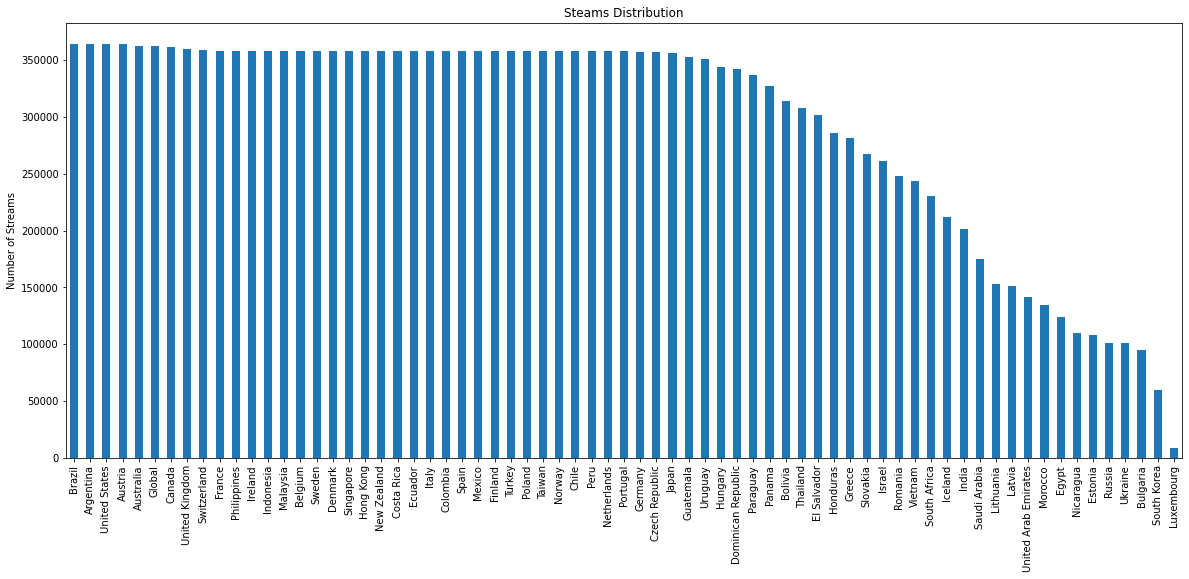

In [ ]:
%time
df["region"].value_counts().plot(kind='bar',
                                       figsize=(20, 8),
                                       ylabel="Number of Streams",
                                       title="Steams Distribution",
                                      );

**2. Pyspark**

In [ ]:
%time
from pyspark.sql.functions import count

stream_count = df_py.groupby('region').agg(count('*').alias('count_streams'))
stream_count.show()

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.11 µs
+--------------------+-------------+
|              region|count_streams|
+--------------------+-------------+
|            Paraguay|       336666|
|              Sweden|       358384|
|         Philippines|       358390|
|            Malaysia|       358390|
|           Singapore|       358388|
|              Turkey|       358190|
|             Germany|       357115|
|              France|       358389|
|              Greece|       281450|
|https://open.spot...|           24|
|              Taiwan|       358187|
|            Slovakia|       267599|
|           Argentina|       364326|
|             Belgium|       358380|
|             Ecuador|       358357|
|https://open.spot...|           93|
|             Finland|       358182|
|          Liro Shaq"|          438|
|           Nicaragua|       109980|
|                Peru|       358137|
+--------------------+-------------+
only showing top 20 rows



**3. Koalas**

In [ ]:
%%time
df_ks_eda.groupby('region').agg({'streams':'sum'})

CPU times: user 18.4 ms, sys: 4.05 ms, total: 22.5 ms
Wall time: 112 ms


,streams
region,
Paraguay,2.118856e+09
Sweden,1.476023e+10
Philippines,1.878597e+10
Malaysia,3.993399e+09
Singapore,3.956236e+09
Turkey,1.262745e+10
Germany,3.993069e+10
France,2.386982e+10
Greece,1.261763e+09


Explore the rating distribution of all trends.

**1. Pandas**

In [ ]:
df["trend"].value_counts()

MOVE_DOWN        8975238
MOVE_UP          7833695
SAME_POSITION    2331423
NEW_ENTRY        1181541
Name: trend, dtype: int64

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 11.9 µs


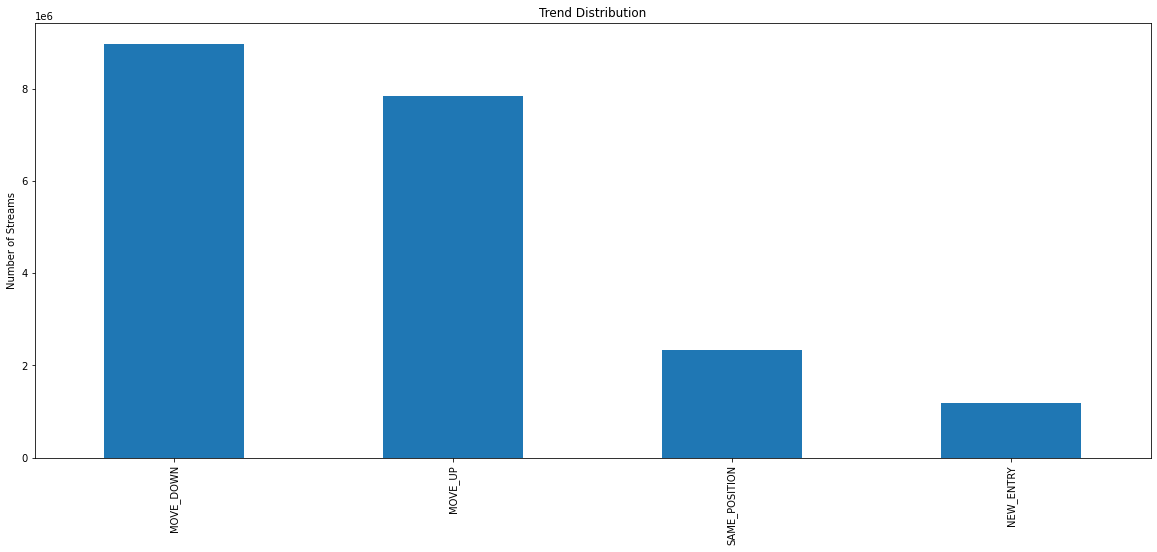

In [ ]:
%time
df["trend"].value_counts().plot(kind='bar',
                                       figsize=(20, 8),
                                       ylabel="Number of Streams",
                                       title="Trend Distribution",
                                      );

**2. Pyspark**

In [ ]:
%time
from pyspark.sql.functions import count

df_py.createOrReplaceTempView('Spotify')
spotify_df = spark.sql('SELECT trend, COUNT(*) FROM Spotify GROUP BY trend;').show()

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.63 µs
+--------------------+--------+
|               trend|count(1)|
+--------------------+--------+
|           NEW_ENTRY| 1180960|
|              top200|    2560|
|             viral50|    3116|
|               India|     177|
|https://open.spot...|      21|
|             Bolivia|      36|
|               Spain|      28|
|             Uruguay|      26|
|            Jay Maly|       1|
|           MOVE_DOWN| 8973763|
|             MOVE_UP| 7832235|
|  Dominican Republic|     601|
|       SAME_POSITION| 2331225|
|           Argentina|       4|
|          Costa Rica|      53|
|              Panama|     110|
|https://open.spot...|      10|
|           Guatemala|       6|
|          Jon Secada|       2|
|              Sweden|      11|
+--------------------+--------+
only showing top 20 rows



**3. Koalas**

In [ ]:
%time
df_ks_eda.groupby("trend").agg({"streams": "sum"})

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.54 µs


,streams
trend,
NEW_ENTRY,4.103430e+10
top200,NaN
viral50,NaN
India,NaN
https://open.spotify.com/track/3dqBmUFihufaWii7TGLXyE,NaN
Bolivia,NaN
Spain,NaN
Uruguay,NaN
Jay Maly,NaN


#  **Asking and Answering Question**

In [11]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
!pip3 install -U matplotlib



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 37.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 KB 55.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.0/300.0 KB 22.6 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


**Q1:What are the ten song titles has the lowest number of streams?**

**a) Pandas**



In [ ]:
%%time
lastten = pd.read_csv(charts)
lastten.tail(10)

CPU times: user 56.5 s, sys: 5 s, total: 1min 1s
Wall time: 1min 9s


,title,rank,date,artist,url,region,chart,trend,streams
26173504,Reckless,41,2021-07-31,Madison Beer,https://open.spotify.com/track/5ajjAnNRh8bxFva...,Vietnam,viral50,SAME_POSITION,NaN
26173505,Aloha,42,2021-07-31,CHO JUNG SEOK,https://open.spotify.com/track/1hOEq5q9L41E2Yb...,Vietnam,viral50,MOVE_DOWN,NaN
26173506,Can I Have the Day With You (feat. Michelle),43,2021-07-31,Sam Ock,https://open.spotify.com/track/11Ymr6CyK8qRVtv...,Vietnam,viral50,MOVE_UP,NaN
26173507,Your Man,44,2021-07-31,Josh Turner,https://open.spotify.com/track/1WzAeadSKJhqykZ...,Vietnam,viral50,NEW_ENTRY,NaN
26173508,As the World Caves In,45,2021-07-31,Sarah Cothran,https://open.spotify.com/track/2xXNLutYAOELYVO...,Vietnam,viral50,MOVE_DOWN,NaN
26173509,BYE,46,2021-07-31,Jaden,https://open.spotify.com/track/3OUyyDN7EZrL7i0...,Vietnam,viral50,MOVE_UP,NaN
26173510,Pillars,47,2021-07-31,My Anh,https://open.spotify.com/track/6eky30oFiQbHUAT...,Vietnam,viral50,NEW_ENTRY,NaN
26173511,Gái Độc Thân,48,2021-07-31,Tlinh,https://open.spotify.com/track/2klsSb2iTfgDh95...,Vietnam,viral50,MOVE_DOWN,NaN
26173512,Renegade (feat. Taylor Swift),49,2021-07-31,Big Red Machine,https://open.spotify.com/track/1aU1wpYBSpP0M6I...,Vietnam,viral50,MOVE_DOWN,NaN
26173513,Letter to Jarad,50,2021-07-31,"LRN Slime, Shiloh Dynasty",https://open.spotify.com/track/508QhA2SncMbh5C...,Vietnam,viral50,MOVE_DOWN,NaN


**b) Pyspark**

In [ ]:
%%time
df_py = spark.read.csv(charts)
df_py.tail(10)

CPU times: user 30.4 ms, sys: 2.49 ms, total: 32.9 ms
Wall time: 3.85 s


[Row(_c0='Reckless', _c1='41', _c2='2021-07-31', _c3='Madison Beer', _c4='https://open.spotify.com/track/5ajjAnNRh8bxFvaVHzpPjh', _c5='Vietnam', _c6='viral50', _c7='SAME_POSITION', _c8=None),
 Row(_c0='Aloha', _c1='42', _c2='2021-07-31', _c3='CHO JUNG SEOK', _c4='https://open.spotify.com/track/1hOEq5q9L41E2YbLhVvW5x', _c5='Vietnam', _c6='viral50', _c7='MOVE_DOWN', _c8=None),
 Row(_c0='Can I Have the Day With You (feat. Michelle)', _c1='43', _c2='2021-07-31', _c3='Sam Ock', _c4='https://open.spotify.com/track/11Ymr6CyK8qRVtvfSBdPoX', _c5='Vietnam', _c6='viral50', _c7='MOVE_UP', _c8=None),
 Row(_c0='Your Man', _c1='44', _c2='2021-07-31', _c3='Josh Turner', _c4='https://open.spotify.com/track/1WzAeadSKJhqykZFbJNmQv', _c5='Vietnam', _c6='viral50', _c7='NEW_ENTRY', _c8=None),
 Row(_c0='As the World Caves In', _c1='45', _c2='2021-07-31', _c3='Sarah Cothran', _c4='https://open.spotify.com/track/2xXNLutYAOELYVObYb1C1S', _c5='Vietnam', _c6='viral50', _c7='MOVE_DOWN', _c8=None),
 Row(_c0='BYE', 

**c) Koalas**

In [ ]:
df_ks.tail(10)

,title,rank,date,artist,url,region,chart,trend,streams
26173504,Reckless,41,2021-07-31,Madison Beer,https://open.spotify.com/track/5ajjAnNRh8bxFva...,Vietnam,viral50,SAME_POSITION,None
26173505,Aloha,42,2021-07-31,CHO JUNG SEOK,https://open.spotify.com/track/1hOEq5q9L41E2Yb...,Vietnam,viral50,MOVE_DOWN,None
26173506,Can I Have the Day With You (feat. Michelle),43,2021-07-31,Sam Ock,https://open.spotify.com/track/11Ymr6CyK8qRVtv...,Vietnam,viral50,MOVE_UP,None
26173507,Your Man,44,2021-07-31,Josh Turner,https://open.spotify.com/track/1WzAeadSKJhqykZ...,Vietnam,viral50,NEW_ENTRY,None
26173508,As the World Caves In,45,2021-07-31,Sarah Cothran,https://open.spotify.com/track/2xXNLutYAOELYVO...,Vietnam,viral50,MOVE_DOWN,None
26173509,BYE,46,2021-07-31,Jaden,https://open.spotify.com/track/3OUyyDN7EZrL7i0...,Vietnam,viral50,MOVE_UP,None
26173510,Pillars,47,2021-07-31,My Anh,https://open.spotify.com/track/6eky30oFiQbHUAT...,Vietnam,viral50,NEW_ENTRY,None
26173511,Gái Độc Thân,48,2021-07-31,Tlinh,https://open.spotify.com/track/2klsSb2iTfgDh95...,Vietnam,viral50,MOVE_DOWN,None
26173512,Renegade (feat. Taylor Swift),49,2021-07-31,Big Red Machine,https://open.spotify.com/track/1aU1wpYBSpP0M6I...,Vietnam,viral50,MOVE_DOWN,None
26173513,Letter to Jarad,50,2021-07-31,"LRN Slime, Shiloh Dynasty",https://open.spotify.com/track/508QhA2SncMbh5C...,Vietnam,viral50,MOVE_DOWN,None


**Answer:** The songs that has the lowest stream are Reckless, Aloha, Can I Have the Day With You(feat.Michelle), Your Man, As the World Caves In, Bye, Pillars, Gái Độc Thân, Renegade(feat. Taylor Swift) and Letter To Jarad. 

**Q2: What is first five row of Ed Sheeran's songs that are more than 80000 streams on Spotify?**

**a) Pandas**

In [ ]:
ed = df.loc[(df['streams'] >80000) & (df['artist'].str.contains('Ed Sheeran', regex=False)),['title','artist', 'date', 'streams']]
ed.head(5)

,title,artist,date,streams
3357,Photograph,Ed Sheeran,2017-01-01,472142.0
3375,Thinking out Loud,Ed Sheeran,2017-01-01,436476.0
11507,Shape of You,Ed Sheeran,2018-03-01,81955.0
12268,Shape of You,Ed Sheeran,2018-03-01,140385.0
12315,Perfect,Ed Sheeran,2018-03-01,88683.0


**b) Pyspark**

In [ ]:
sheeran = df_py.filter((col("streams") > 80000) & (col("artist").rlike("Ed Sheeran"))).select("title", "artist", "date", "streams")
sheeran.show(5)

+-----------------+----------+----------+-------+
|            title|    artist|      date|streams|
+-----------------+----------+----------+-------+
|       Photograph|Ed Sheeran|2017-01-01| 472142|
|Thinking out Loud|Ed Sheeran|2017-01-01| 436476|
|     Shape of You|Ed Sheeran|2018-03-01|  81955|
|     Shape of You|Ed Sheeran|2018-03-01| 140385|
|          Perfect|Ed Sheeran|2018-03-01|  88683|
+-----------------+----------+----------+-------+
only showing top 5 rows



**c) Koalas**

In [ ]:
ed_sheeran = df_ks[(df_ks['streams'] > 80000) & (df_ks['artist'].str.contains('Ed Sheeran', regex=False))][['title','artist','date','streams']]
ed_sheeran.head(5)

/usr/local/lib/python3.8/dist-packages/pyspark/sql/pandas/functions.py:394: UserWarning: In Python 3.6+ and Spark 3.0+, it is preferred to specify type hints for pandas UDF instead of specifying pandas UDF type which will be deprecated in the future releases. See SPARK-28264 for more details.
  warnings.warn(


,title,artist,date,streams
3357,Photograph,Ed Sheeran,2017-01-01,472142
3375,Thinking out Loud,Ed Sheeran,2017-01-01,436476
11507,Shape of You,Ed Sheeran,2018-03-01,81955
12268,Shape of You,Ed Sheeran,2018-03-01,140385
12315,Perfect,Ed Sheeran,2018-03-01,88683


**Answer:** The songs of Ed Sheeran that are more than 80000 streams on Spotify are Photograph, Thinking Out Loud, Shape of You and Perfect.

**Q3: What are the most frequent artist names that appear with more than 100000 streams on spotify?**

**a) Pandas**

In [ ]:
from wordcloud import WordCloud

CPU times: user 22.1 s, sys: 1.19 s, total: 23.2 s
Wall time: 24.8 s


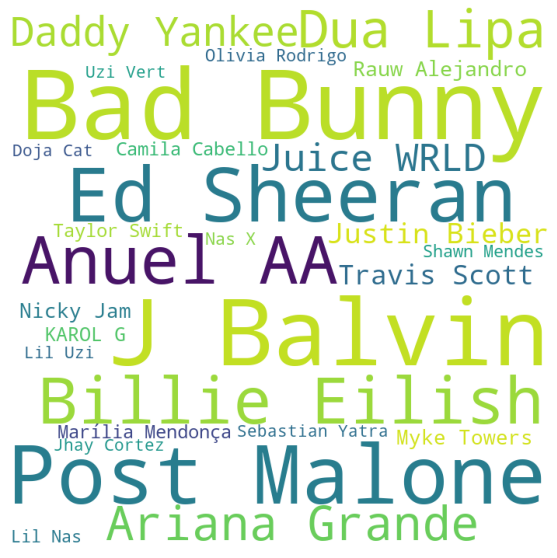

In [ ]:
%%time
words = WordCloud(width=700,height=700,min_font_size=20,background_color='white')
spam_wc = words.generate(df[df['streams'] > 100000]['artist'].str.cat(sep=" "))

plt.figure(figsize=(20,10))
plt.axis('off')
plt.imshow(spam_wc)

**Pyspark & Koalas**

The Wordcloud is unavailable in both Pyspark and Koalas library since the Wordcloud can only be built in Pandas dataframes.

**Answer:** The artist name that frequently appear with more than 100000 streams on Spotify is mainly Bad Bunny, Post Malone, J Balvin and followed by other artists showed on the figure above.

**Q4: Which artist has the maximum amount of times who has been in the Top 200?**

**a) Pandas**

In [ ]:
%%time
max = df.groupby(['artist'])['rank'].agg('count').sort_values(ascending=False) 
new_max = max.head(20)
new_max

CPU times: user 5.09 s, sys: 143 ms, total: 5.23 s
Wall time: 5.26 s


artist
Ed Sheeran         387917
Billie Eilish      251825
Post Malone        211272
Bad Bunny          203403
Ariana Grande      189914
Dua Lipa           187085
Drake              177380
Imagine Dragons    157900
XXXTENTACION       155458
BTS                154338
The Weeknd         153292
Justin Bieber      130397
Travis Scott       122980
Juice WRLD         121933
Maluma             110762
Shawn Mendes       108786
Harry Styles       107539
Maroon 5           105610
Doja Cat           104325
Lewis Capaldi      101700
Name: rank, dtype: int64

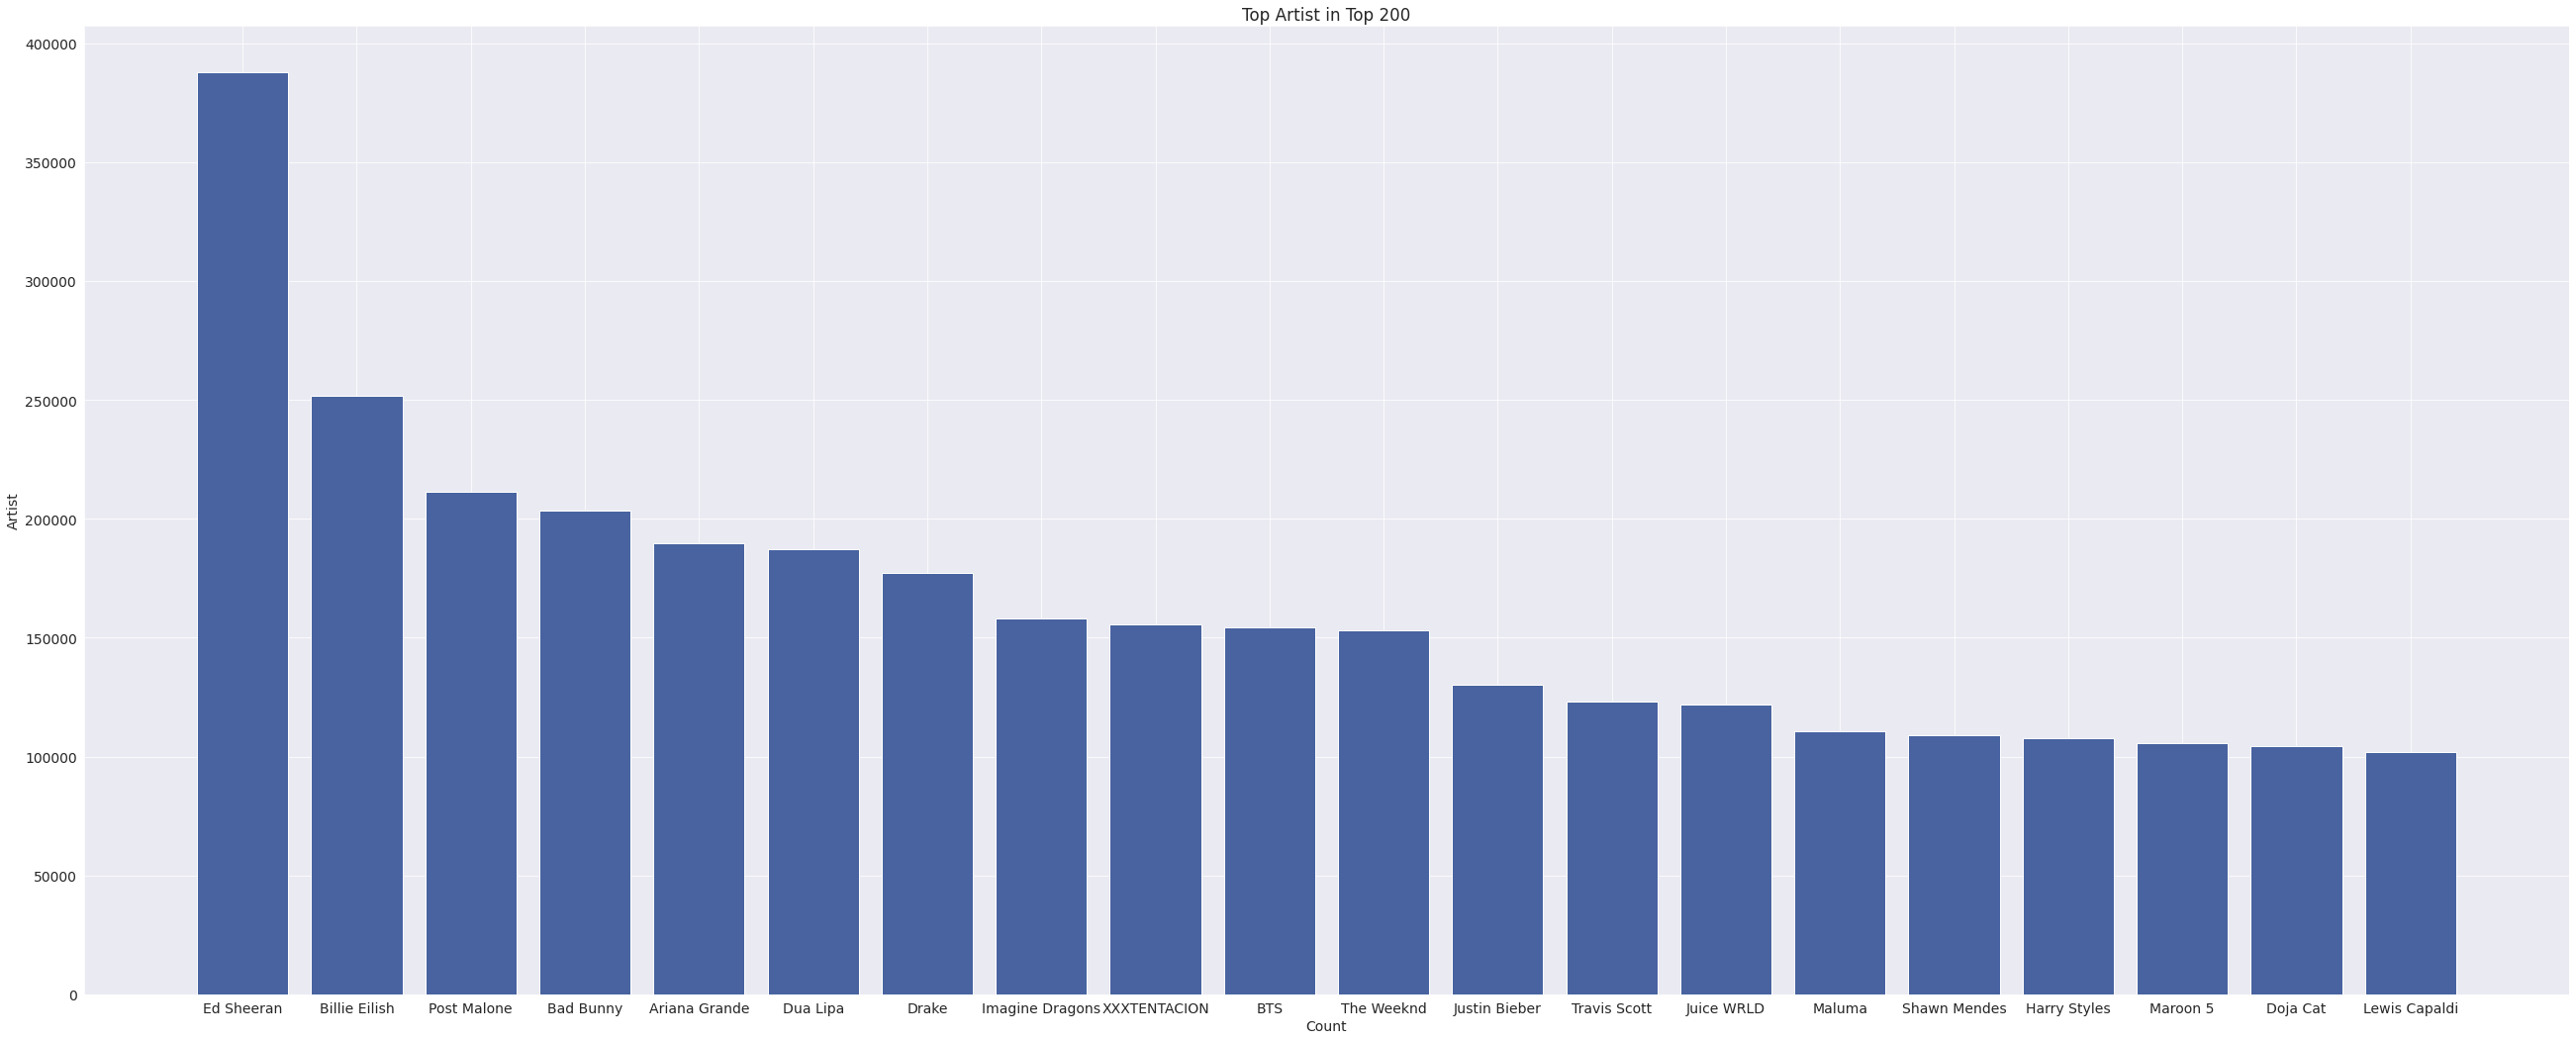

CPU times: user 661 ms, sys: 14.4 ms, total: 675 ms
Wall time: 683 ms


In [ ]:
%%time
plt.figure(figsize = (45,18))
plt.bar(new_max.index, new_max.values,color='#4863A0')
plt.title('Top Artist in Top 200')
plt.xlabel('Count')
plt.ylabel('Artist')
plt.show()

**b) PySpark**

In [16]:
from pyspark.sql.functions import count as _count

In [ ]:
%%time
py_max = df_py.groupBy("artist").agg(_count("rank")).orderBy('count(rank)', ascending=False)
new = py_max.show(20)
new

+---------------+-----------+
|         artist|count(rank)|
+---------------+-----------+
|     Ed Sheeran|     387917|
|  Billie Eilish|     251825|
|    Post Malone|     211272|
|      Bad Bunny|     203403|
|  Ariana Grande|     189914|
|       Dua Lipa|     187085|
|          Drake|     177380|
|Imagine Dragons|     157900|
|   XXXTENTACION|     155458|
|            BTS|     154338|
|     The Weeknd|     153292|
|  Justin Bieber|     130397|
|   Travis Scott|     122980|
|     Juice WRLD|     121933|
|         Maluma|     110762|
|   Shawn Mendes|     108786|
|   Harry Styles|     107539|
|       Maroon 5|     105610|
|       Doja Cat|     104325|
|  Lewis Capaldi|     101700|
+---------------+-----------+
only showing top 20 rows

CPU times: user 522 ms, sys: 47.5 ms, total: 569 ms
Wall time: 1min 19s


In [ ]:
%%time

py_new = df_py.groupby("artist").agg(_count('rank'))
count = py_new['count(rank)']
py_new = py_new.sort(count.desc())
py_new = py_new.toPandas()


CPU times: user 1.08 s, sys: 59.8 ms, total: 1.14 s
Wall time: 1min 1s


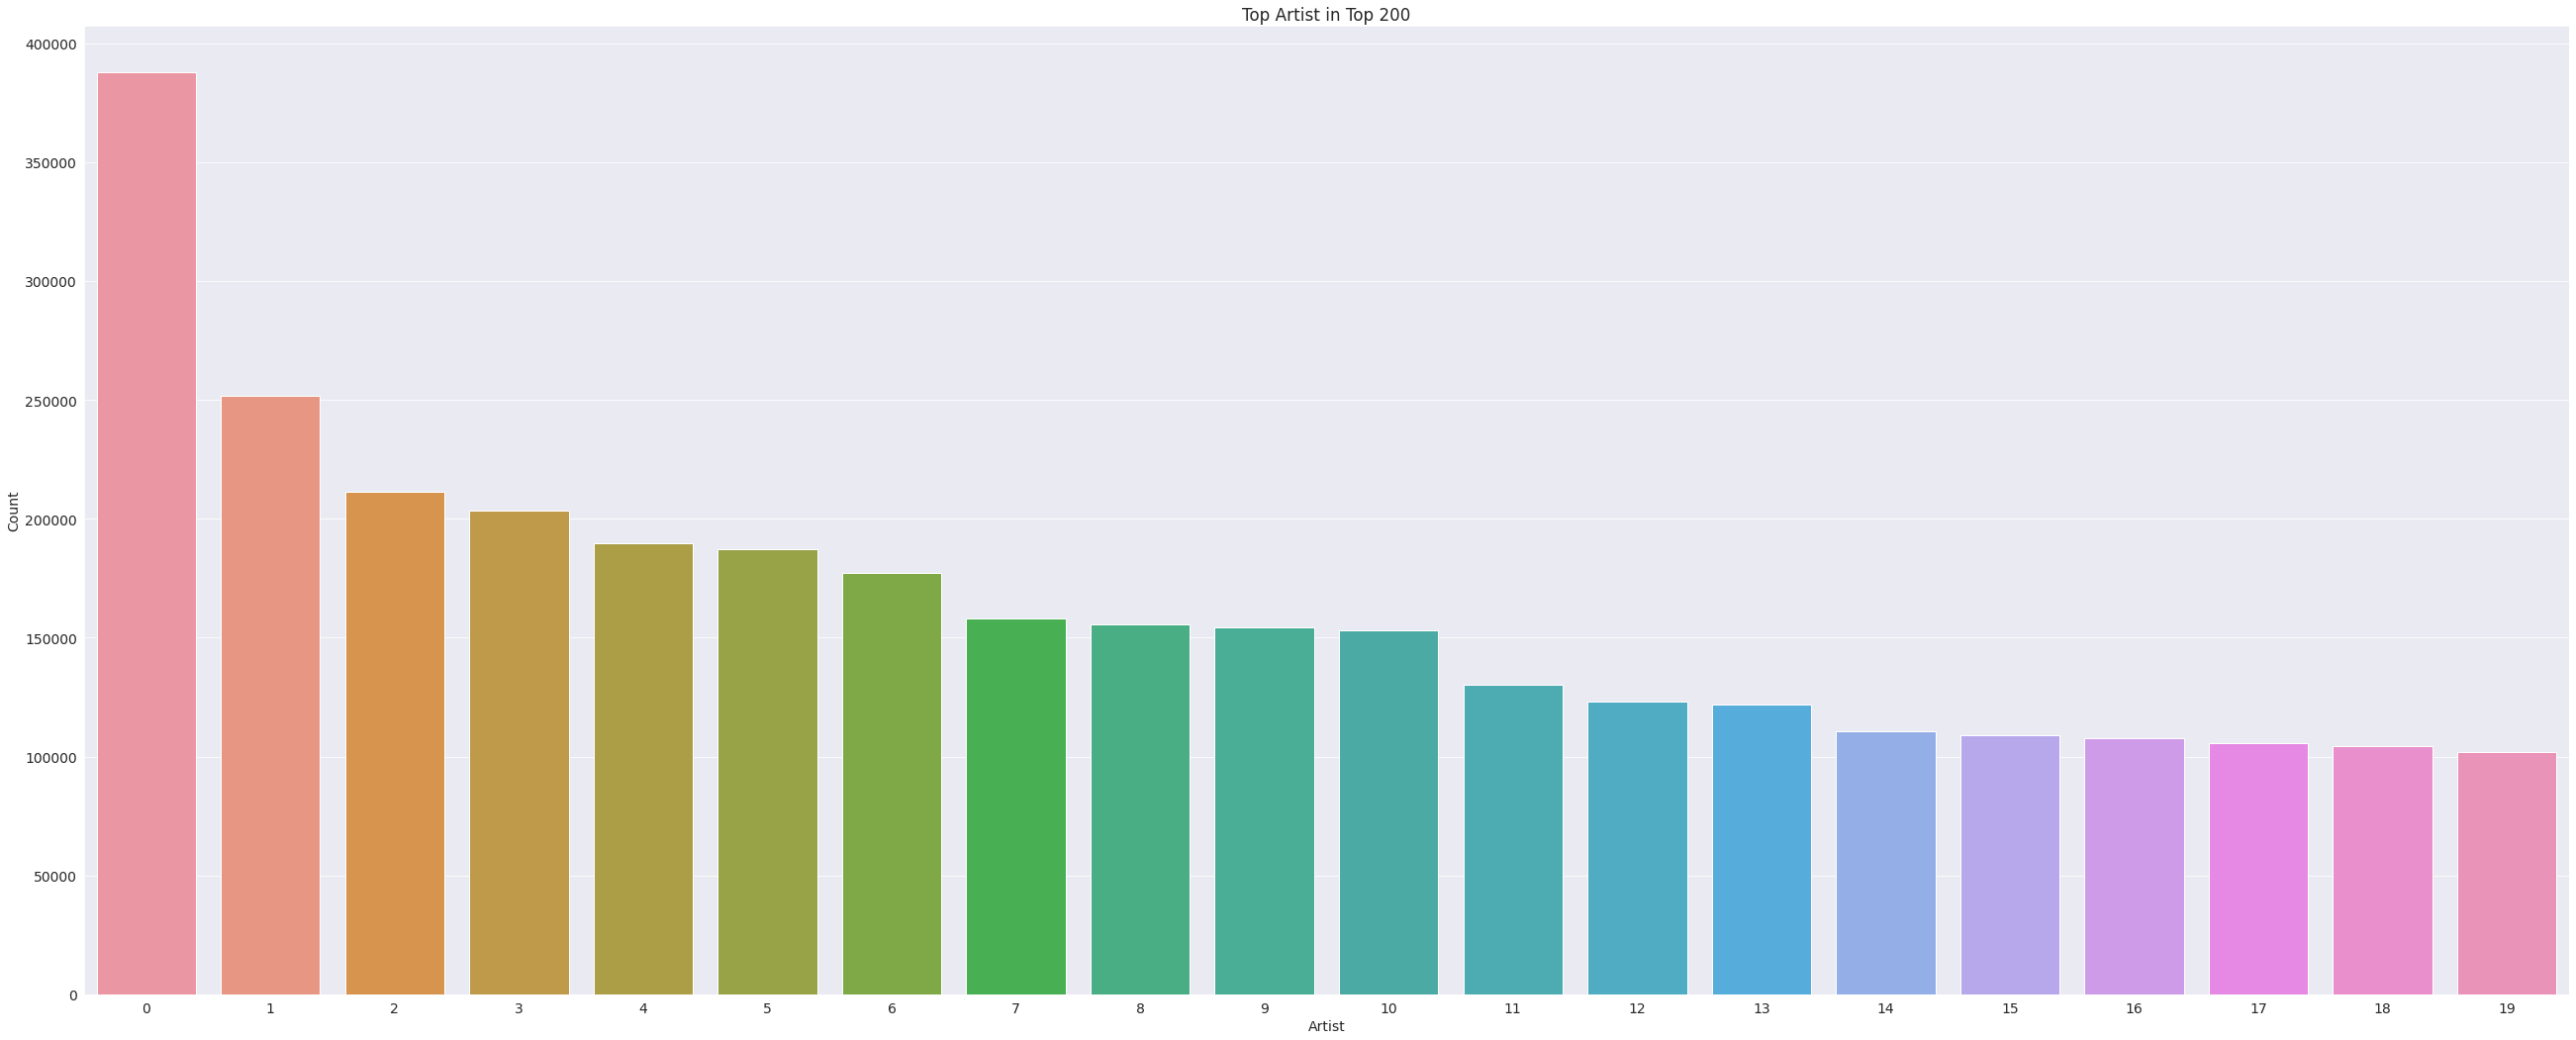

CPU times: user 701 ms, sys: 32.7 ms, total: 733 ms
Wall time: 845 ms


In [ ]:
%%time
plt.figure(figsize = (45,18))
plt.title('Top Artist in Top 200')
sns.barplot(x=py_new['artist'].index[:20], y=py_new['count(rank)'].values[:20])
plt.xlabel('Artist')
plt.ylabel('Count')
plt.show()

**c) Koalas**

In [ ]:
%%time
ks_max = df_ks.groupby("artist").agg({'rank':'count'}).sort_values(by='rank', ascending=False)
ks_max = ks_max[:20]
ks_max

/usr/local/lib/python3.8/dist-packages/pyspark/sql/dataframe.py:127: UserWarning: DataFrame constructor is internal. Do not directly use it.
  warnings.warn("DataFrame constructor is internal. Do not directly use it.")


CPU times: user 1.44 s, sys: 140 ms, total: 1.58 s
Wall time: 3min 10s


,rank
artist,
Ed Sheeran,387917
Billie Eilish,251825
Post Malone,211272
Bad Bunny,203403
Ariana Grande,189914
Dua Lipa,187085
Drake,177380
Imagine Dragons,157900
XXXTENTACION,155458


In [ ]:
%%time
ks_max = ks_max.toPandas()

/usr/local/lib/python3.8/dist-packages/databricks/koalas/frame.py:4901: FutureWarning: DataFrame.toPandas is deprecated as of DataFrame.to_pandas. Please use the API instead.
  warnings.warn(


CPU times: user 21 ms, sys: 1.53 ms, total: 22.6 ms
Wall time: 264 ms


<Figure size 3240x1296 with 0 Axes>

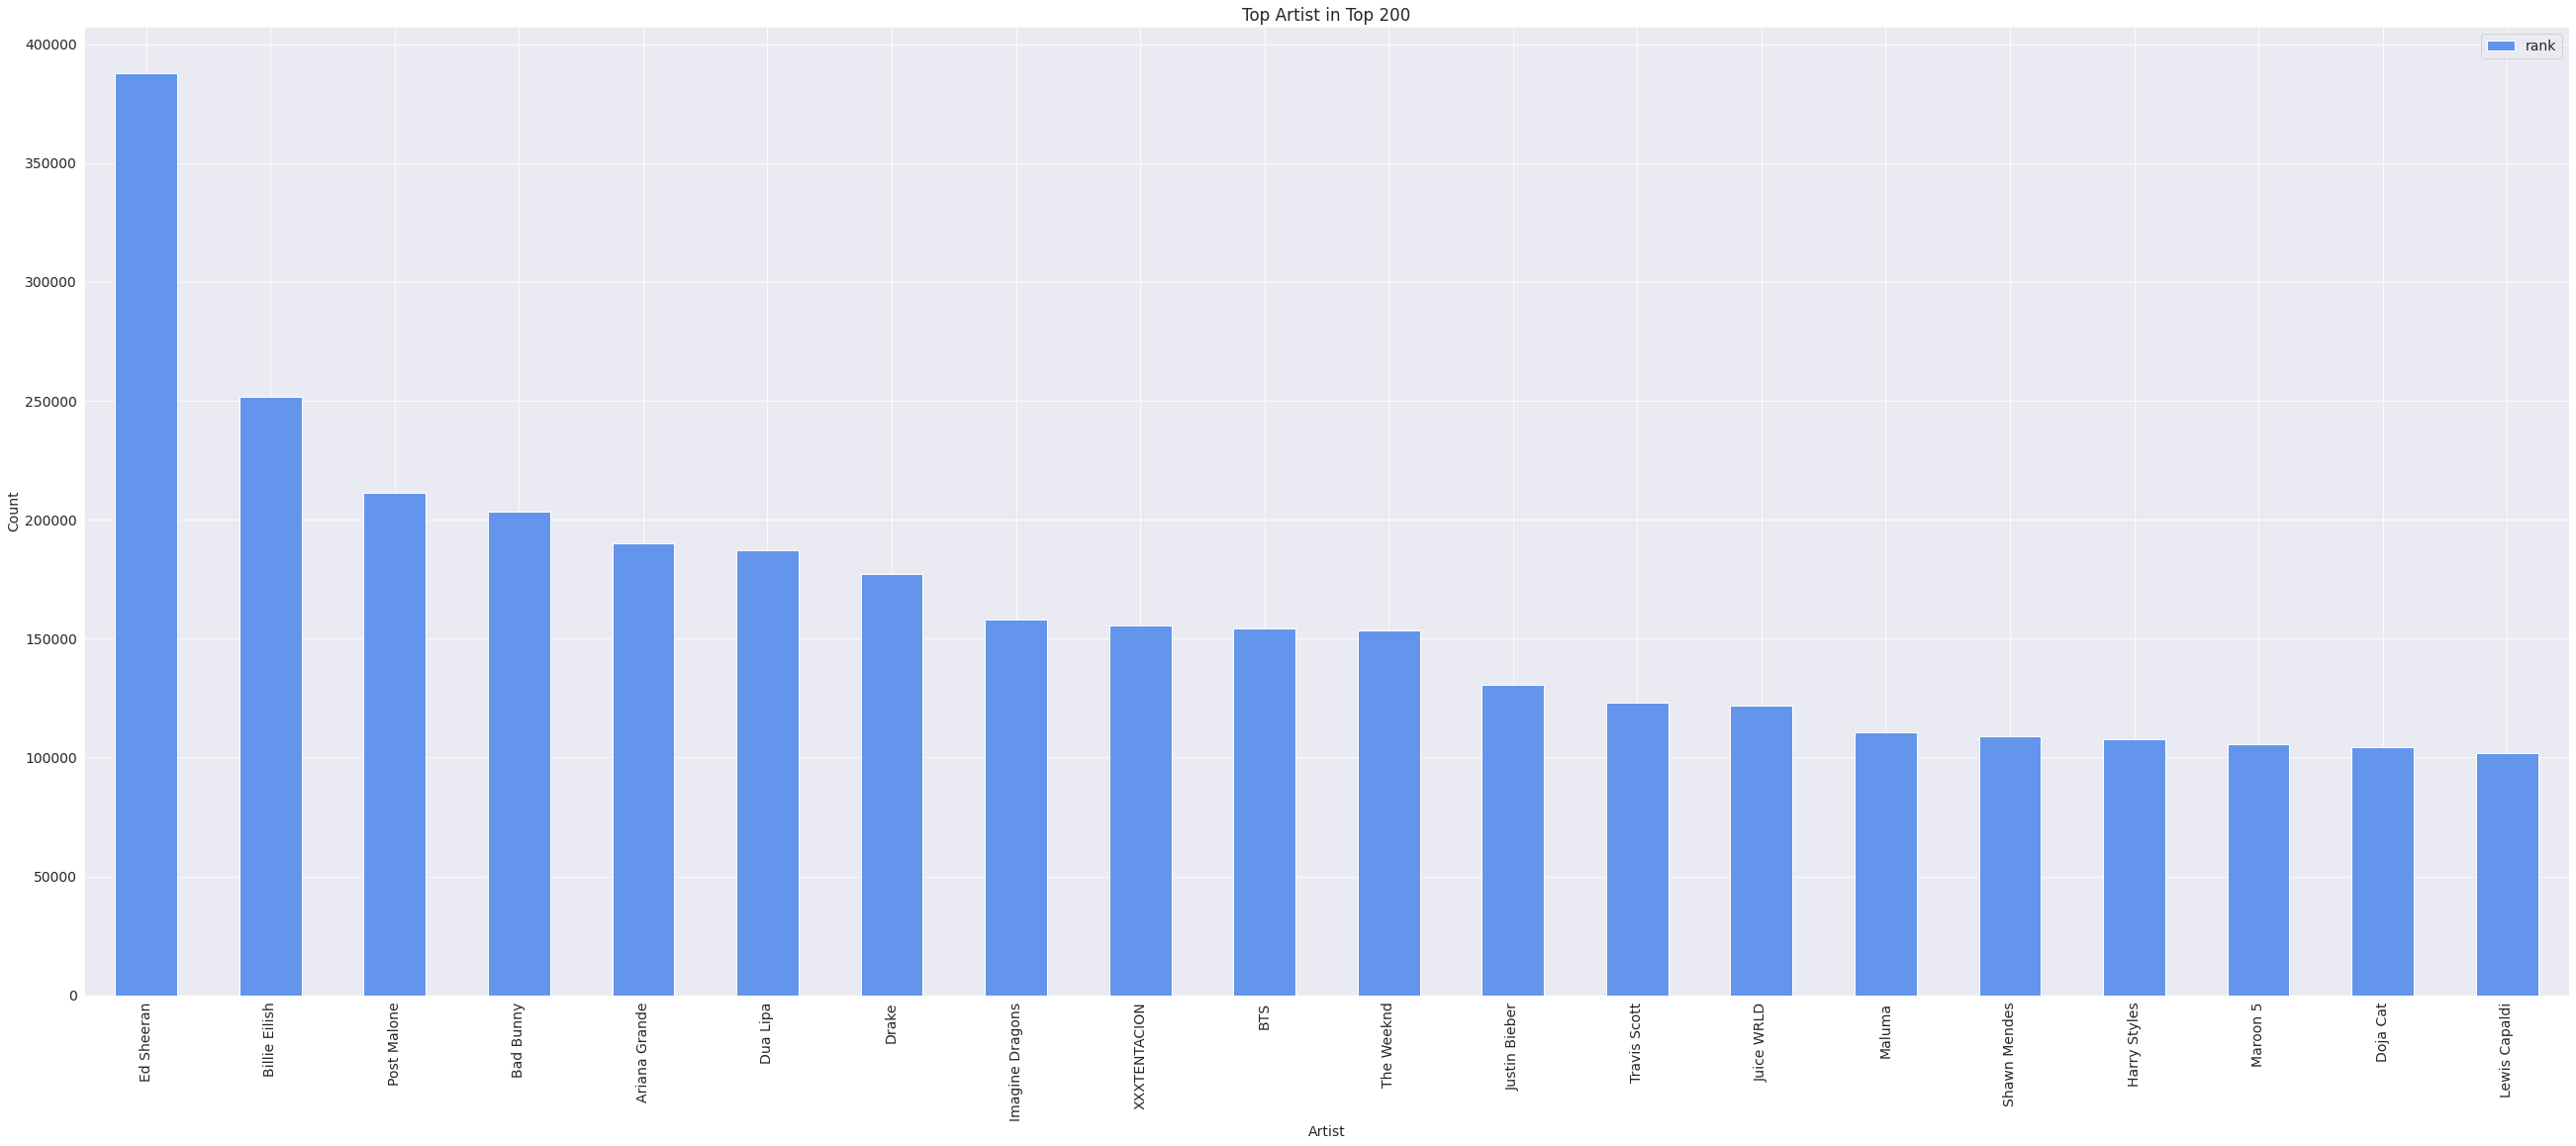

CPU times: user 765 ms, sys: 59.9 ms, total: 825 ms
Wall time: 861 ms


In [ ]:
%%time
plt.figure(figsize = (45,18))
ks_max.plot(kind='bar', figsize=(45,18),color='#6495ED')
plt.title('Top Artist in Top 200')
plt.xlabel('Artist')
plt.ylabel('Count')
plt.show()

**Answer:** The artist who has the maximum amount of times in the Top 200 is Ed Sheeran with a number of 387917 times, followed by Billie Eilish with 251825 and lastly by Post Malone with a number of 211272 times.

**Q5: Which song has the highest number of times amount of streams?**

**a) Pandas**

In [17]:
%%time
song = df.groupby(['title'])['streams'].agg('count').sort_values(ascending=False) 
new_song = song.head(10)
new_song

CPU times: user 7.08 s, sys: 266 ms, total: 7.35 s
Wall time: 7.33 s


title
Shape of You                                     65262
Believer                                         58310
Perfect                                          52732
Someone You Loved                                50975
Happier                                          48362
Blinding Lights                                  47747
Dance Monkey                                     43369
Shallow                                          41312
Don't Start Now                                  40240
Sunflower - Spider-Man: Into the Spider-Verse    39645
Name: streams, dtype: int64

CPU times: user 36.7 ms, sys: 1.88 ms, total: 38.6 ms
Wall time: 42.9 ms


Text(0.5, 1.0, 'Songs with Highest Streams')

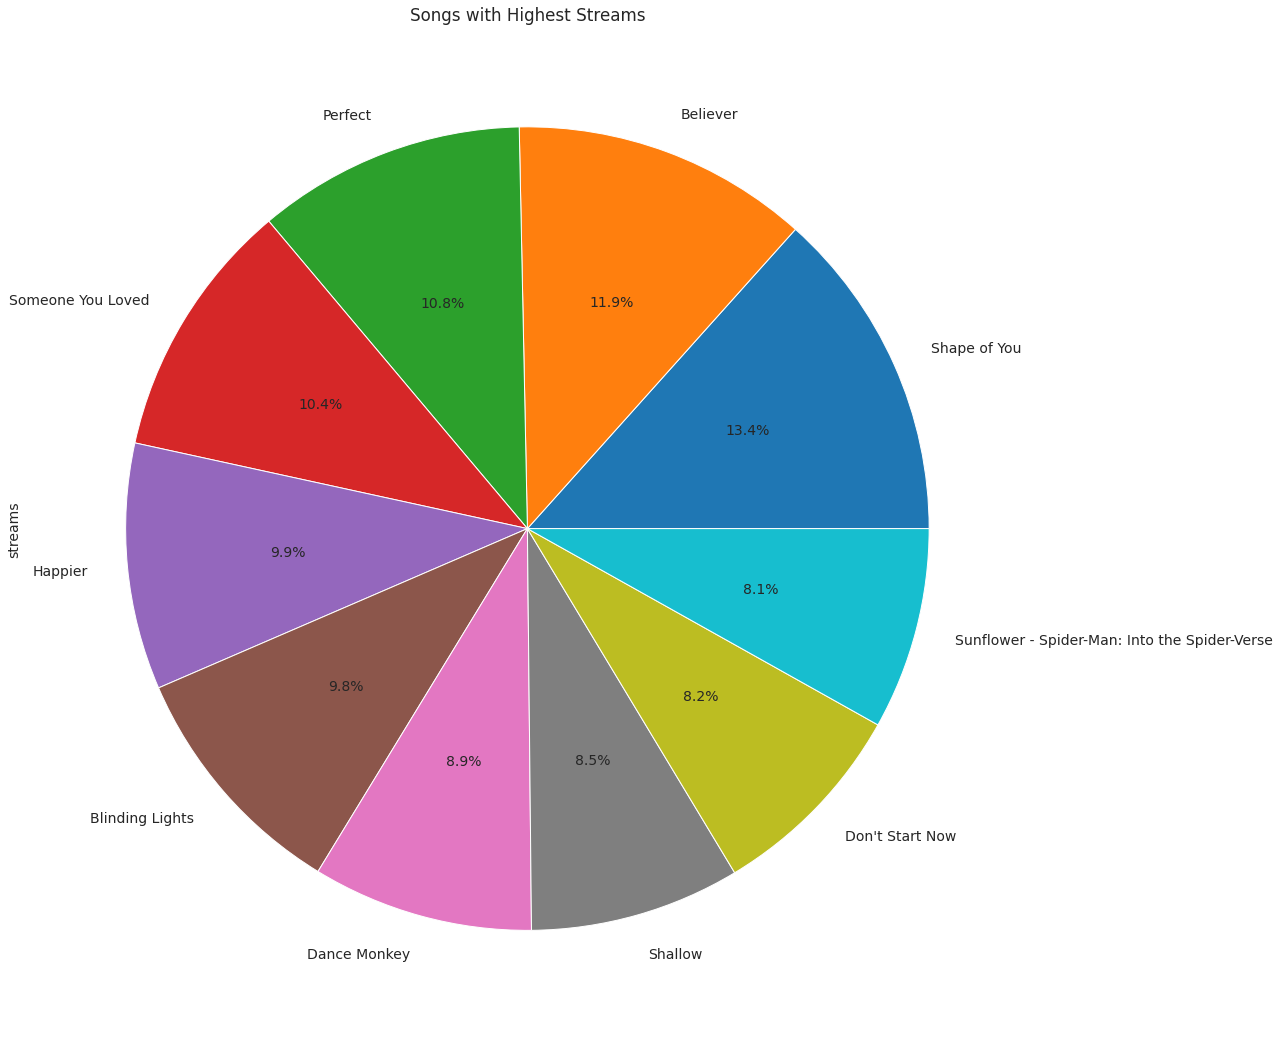

In [18]:
%%time
plt.figure(figsize = (18,20))
new_song.plot.pie(autopct="%.1f%%")
plt.title('Songs with Highest Streams')

**b) PySpark**

In [19]:
%%time
songs = df_py.groupBy("title").agg(_count("streams")).orderBy('count(streams)', ascending=False)
new_songs = songs.show(10)
new_songs

+--------------------+--------------+
|               title|count(streams)|
+--------------------+--------------+
|        Shape of You|         65262|
|            Believer|         58310|
|             Perfect|         52732|
|   Someone You Loved|         50975|
|             Happier|         48362|
|     Blinding Lights|         47747|
|        Dance Monkey|         43369|
|             Shallow|         41312|
|     Don't Start Now|         40240|
|Sunflower - Spide...|         39645|
+--------------------+--------------+
only showing top 10 rows

CPU times: user 440 ms, sys: 44 ms, total: 484 ms
Wall time: 1min 14s


In [20]:
%%time

py_song = df_py.groupby("title").agg(_count('streams'))
counted = py_song['count(streams)']
py_song = py_song.sort(counted.desc())
py_song = py_song.toPandas()

CPU times: user 1.49 s, sys: 82 ms, total: 1.57 s
Wall time: 1min 9s


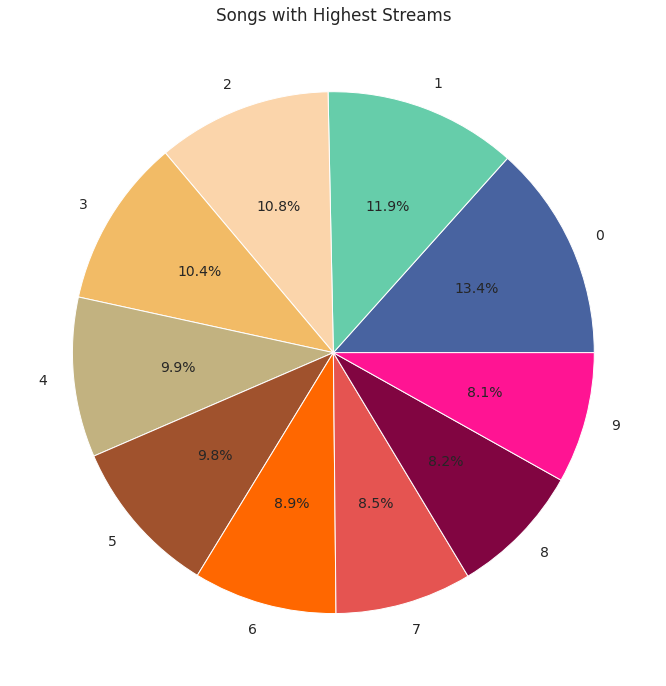

CPU times: user 159 ms, sys: 2.67 ms, total: 162 ms
Wall time: 167 ms


In [21]:
%%time

plt.figure(figsize=(18,12)) 
labels = py_song.index[:10]
values = py_song['count(streams)'].values[:10]
colors = ['#4863A0', '#66CDAA', '#FBD5AB', '#F2BB66', '#C2B280', '#A0522D', '#FF6700', '#E55451', '#810541', '#FF1493']
plt.pie(values, colors=colors, labels=labels, autopct='%1.1f%%')
plt.title('Songs with Highest Streams')
plt.show()

**c) Koalas**

In [ ]:
%%time
ks_song = df_ks.groupby("title").agg({'streams':'count'})
ks_song = ks_song.sort_values(by='streams', ascending=False)
ks_song = ks_song[:10]

/usr/local/lib/python3.8/dist-packages/pyspark/sql/dataframe.py:148: UserWarning: DataFrame.sql_ctx is an internal property, and will be removed in future releases. Use DataFrame.sparkSession instead.
  warnings.warn(


CPU times: user 579 ms, sys: 55.8 ms, total: 635 ms
Wall time: 1min 13s


/usr/local/lib/python3.8/dist-packages/pyspark/sql/dataframe.py:127: UserWarning: DataFrame constructor is internal. Do not directly use it.
  warnings.warn("DataFrame constructor is internal. Do not directly use it.")


In [ ]:
%%time
ks_song = ks_song.toPandas()

/usr/local/lib/python3.8/dist-packages/databricks/koalas/frame.py:4901: FutureWarning: DataFrame.toPandas is deprecated as of DataFrame.to_pandas. Please use the API instead.
  warnings.warn(


CPU times: user 27.8 ms, sys: 2.82 ms, total: 30.6 ms
Wall time: 563 ms


<timed exec>:3: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.


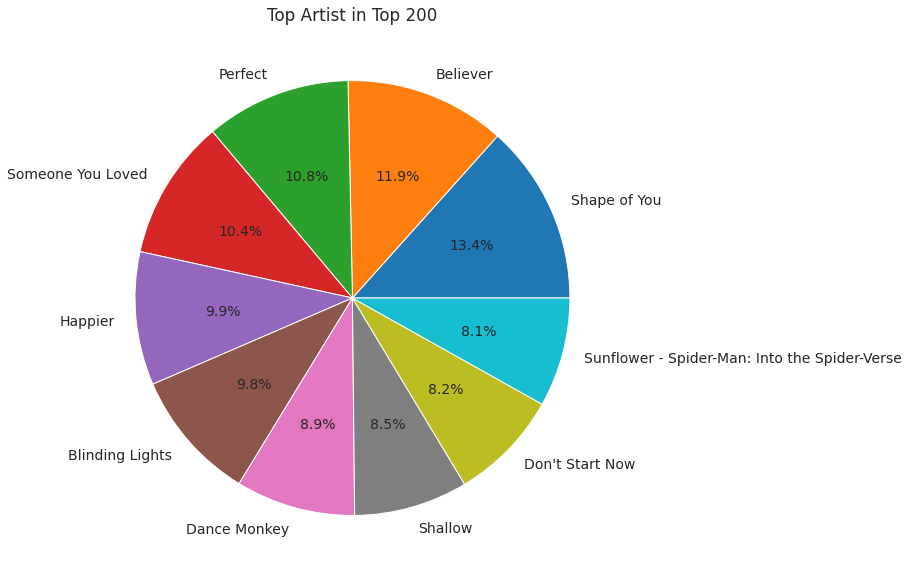

CPU times: user 265 ms, sys: 6.1 ms, total: 272 ms
Wall time: 295 ms


In [ ]:
%%time
plt.rcParams['figure.figsize']=(40,10)
labels = ks_song.index
plt.pie(ks_song,labels=labels, autopct='%1.1f%%')
plt.title('Top Artist in Top 200')
plt.show()

**Answer:** The song which has the highest number of times amount of streams is Shape of You with 65262 streams.

#**Conclusion**

From the analysis that we have done, we can conclude that the best library is PySpark as the running time for PySpark is the least compared to Koalas and Pandas.
